In [0]:
import re
import pandas as pd
import os
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()

Saving sample.txt to sample.txt


In [0]:
f1 = open("sample.txt", "rt")
regex_X = r"X([\d]*\.?[\d]*)"
matches_X = re.findall(regex_X, f1.read())
f1.close()

f1 = open("sample.txt", "rt")
regex_Y = r"Y([\d]*\.?[\d]*)"
matches_Y = re.findall(regex_Y, f1.read())
f1.close()

f1 = open("sample.txt", "rt")
regex_Z = r"Z([\d]*\.?[\d]*)"
matches_Z = re.findall(regex_Z, f1.read())
f1.close()

f1 = open("sample.txt", "rt")
regex_E = r"E([\d]*\.?[\d]*)"
matches_E = re.findall(regex_E, f1.read())
f1.close()

f1 = open("sample.txt", "rt")
regex_F = r"F([\d]*\.?[\d]*)"
matches_F = re.findall(regex_F, f1.read())
f1.close()

In [0]:
values_X = []
values_Y = []
values_Z = []
values_E = []
values_F = []
for match in matches_X:
    values_X.append(float(match))

for match in matches_Y:
    values_Y.append(float(match))

for match in matches_Z:
    values_Z.append(float(match))

for match in matches_E:
    values_E.append(float(match))

for match in matches_F:
    values_F.append(float(match))

In [0]:
count_X = len(values_X)
count_Y = len(values_Y) 
count_Z = len(values_Z) 
count_E = len(values_E)
n = count_X - 1

Executing the cell below will generate examples of the available co-ordinates 

In [0]:
all_values = []
available_points = []
for i in range(n): 
  if (values_X[i] != values_X[i+1]):
    m = ((values_Y[i+1] - values_Y[i])/(values_X[i+1] - values_X[i]))
    temp_X1 = (values_X[i] * 10)
    temp_X2 = (values_X[i+1] * 10)
    temp_X = abs(temp_X2 - temp_X1)
    temp_X = int(temp_X)
    if (values_X[i] > values_X[i+1]):
      X = values_X[i+1]
    else:
      X = values_X[i]
    for j in range(temp_X):
      if (values_X[i] < values_X[i+1]):
        X -= 0.1 
      else:
        X += 0.1
      Y = (m*(X - values_X[i])) + values_Y[i]
      #f = "|" + str('%.2f'%X) + "," + str('%.2f'%Y) + "|"
      f = ('%.2f'%X, '%.2f'%Y)
      available_points.append(f)
      #print('%.2f'%X, '%.2f'%Y, sep=",")

  else:
    temp_Y1 = (values_Y[i] * 10)
    temp_Y2 = (values_Y[i+1] * 10)
    temp_Y = abs(temp_Y2 - temp_Y1)
    temp_Y = int(temp_Y)
    if (values_Y[i] > values_Y[i+1]):
      Y = values_Y[i+1]
    else:
      Y = values_Y[i]
    for k in range(temp_Y):
      X = values_X[i]
      if (values_Y[i] > values_Y[i+1]):
        Y -= 0.1 
      else:
        Y += 0.1
      #f = "|" + str('%.2f'%X) + "," + str('%.2f'%Y) + "|"
      f = ('%.2f'%X, '%.2f'%Y)
      available_points.append(f)
      #print('%.2f'%X, '%.2f'%Y, sep=" , ")
  print(available_points)
  all_values.extend(available_points)
  available_points.clear()
  #print("____________________________________________________________________________________________________________________")


[('100.67', '82.19'), ('100.77', '82.19'), ('100.87', '82.19'), ('100.97', '82.19'), ('101.07', '82.19'), ('101.17', '82.19'), ('101.27', '82.19')]
[('100.47', '82.09'), ('100.37', '81.99'), ('100.27', '81.89'), ('100.17', '81.79'), ('100.07', '81.69'), ('99.97', '81.59'), ('99.87', '81.50'), ('99.77', '81.40'), ('99.67', '81.30'), ('99.57', '81.20'), ('99.47', '81.10'), ('99.37', '81.00')]
[('101.81', '83.52'), ('101.81', '83.62'), ('101.81', '83.72'), ('101.81', '83.82'), ('101.81', '83.92'), ('101.81', '84.02'), ('101.81', '84.12')]
[('99.97', '82.29'), ('100.07', '82.39'), ('100.17', '82.49'), ('100.27', '82.59'), ('100.37', '82.69'), ('100.47', '82.79'), ('100.57', '82.89'), ('100.67', '82.99'), ('100.77', '83.09'), ('100.87', '83.19'), ('100.97', '83.29'), ('101.07', '83.39'), ('101.17', '83.49'), ('101.27', '83.59'), ('101.37', '83.69'), ('101.47', '83.79'), ('101.57', '83.89'), ('101.67', '83.99'), ('101.77', '84.09')]
[('99.26', '82.19'), ('99.36', '82.19'), ('99.46', '82.19')

In [0]:
x, y = zip(*all_values)

After executing the cell below you will see a rough representation of the available points on the top layer.

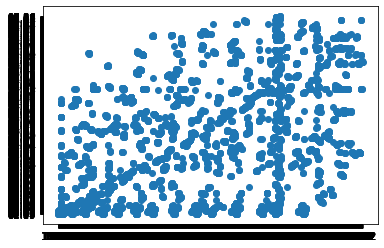

In [0]:
plt.scatter(x, y)
plt.show()

In [0]:
def Z_motion(a, b, c, e, f):
  high_Z = max(values_Z) + 0.1
  current_X = values_X[-1]
  current_Y = values_Y[-1]
  line1 = "G1 "+"X"+str(current_X)+" Y"+str(current_Y)+" Z"+str('%.2f'%high_Z)+" F"+str(f)
  line2 = "G1 "+"X"+str(a)+" Y"+str(b)+" Z"+str('%.2f'%high_Z)+" F"+str(f)
  line3 = "G1 "+"X"+str(a)+" Y"+str(b)+" Z"+str('%.2f'%(high_Z - 0.1))+" F"+str(f)
  line4 = "G1 "+"X"+str(a)+" Y"+str(b)+" Z"+str(c)+" E"+str(e)+" F"+str(f)
  code_addition = line1+"\n"+line2+"\n"+line3+"\n"+line4
  return code_addition

In [0]:
f1.close()
f1 = open("sample.txt", "at")

# ***Input Cell***

---


Cell below is an input cell where we can give the desired XY position where we want the Z-Axis motion.

Before executing the cell below, follow these steps:


1.   Put the cursor in the cell below and replace "X co-ordinate" with an X value.
2.   then replace "Y co-ordinate" with a y value.
3.   then replace "height of vertical movement" with a Z value.
4.   then replace "extrusion value" with a value for amount to be extruded.
5. now Execute the cell

example:

added_code  =  Z_motion(91.8,  84.73,  20.2,  102,  values_F[-1])



In [0]:
added_code = Z_motion(87.35, 81.69, 23, 102, values_F[-1])

In [0]:
f1.write(added_code)
f1.close()

After executing the cell below, the edited G-Code will be downloaded to your computer.


In [0]:
files.download("sample.txt")


In [0]:
os.remove("sample.txt")

In [0]:
all_values.clear()

In [0]:
values_X.clear()
values_Y.clear()
values_Z.clear()
values_E.clear()
values_F.clear()